# Final Proejct Code
By: Dean Smith and David Brennan

In this notebook, we will be performing bias analysis on the D3boards.com blog being favorable towards some teams. We will import our scraped data from the site and break it up by year, we will clean and prepare our data, we will train a Word2Vec word embedding for our data, and we will analyze our results.

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import pandas as pd
import numpy as np
import source

## Data Preparation

First, we initiate our DataPrep() object from our source code to help us load our data. Lets see what our data looks like:

In [15]:
dataPrep = source.DataPrep()

df = dataPrep.loadData()

df

,User,Date,Message
0,cameltime,"April 27, 2005, 02:38:16 PM",Great post-up Jeff! Classic stuff.\n
1,SD bball,"May 01, 2005, 12:50:53 AM",Good quetions. Both are good prospects for th...
2,cameltime,"May 19, 2005, 01:37:17 PM",Charles Stone was getting meaner and nastier t...
3,jeff williams,"June 07, 2005, 06:21:38 AM","Yet another two-guard is headed to Williams, K..."
4,hook52,"June 10, 2005, 07:35:54 AM",Amherst may have the deepest tesm in the NESCA...
...,...,...,...
30636,nescac1,"March 23, 2024, 12:57:01 PM",David Murray to D2 Merrimack:https://x.com/ada...
30637,toad22,"March 23, 2024, 02:59:57 PM","\nQuote from: SpringSt7 on March 23, 2024, 10:..."
30638,Bucket,"March 23, 2024, 03:42:29 PM","\nQuote from: nescac1 on March 23, 2024, 12:57..."
30639,nescac1,"March 23, 2024, 05:13:22 PM","Thanks Bucket, my bad! Impressive for Murray ..."


Next, we want to clean our data. Within this cleaning process we will:
- Break up our data into different dataframes for each basketball season
- Tokenize the messages in our data

In [16]:
df = dataPrep.cleanData(df)

We now want to train our different Word2Vec word embeddings for each season in our data

In [17]:
embedder = source.Model()

models = embedder.trainModels(df)

In [18]:
evaluator = source.BiasEval()

teams = ["middlebury", "amherst", "williams"]

sentimentScores = {
    "2013" : evaluator.getCosineSimScores(teams, models["2013"], "2013"),
    "2014" : evaluator.getCosineSimScores(teams, models["2014"], "2014"),
    "2015" : evaluator.getCosineSimScores(teams, models["2015"], "2015"),
    "2016" : evaluator.getCosineSimScores(teams, models["2016"], "2016"),
    "2017" : evaluator.getCosineSimScores(teams, models["2017"], "2017"),
    "2018" : evaluator.getCosineSimScores(teams, models["2018"], "2018"),
    "2019" : evaluator.getCosineSimScores(teams, models["2019"], "2019"),
    "2022" : evaluator.getCosineSimScores(teams, models["2022"], "2022"),
    "2023" : evaluator.getCosineSimScores(teams, models["2023"], "2023"),
    "2024" : evaluator.getCosineSimScores(teams, models["2024"], "2024"),
    #"full" : evaluator.getCosineSimScores(teams, models["full"], "full (2021-2024)"),
}

Sentiment Scores for 2013: 
- middlebury: 0.21141724
- amherst: 0.2150549
- williams: 0.21970417


Sentiment Scores for 2014: 
- middlebury: 0.12807351
- amherst: 0.124445714
- williams: 0.12472982


Sentiment Scores for 2015: 
- middlebury: 0.21114159
- amherst: 0.21090896
- williams: 0.21368007


Sentiment Scores for 2016: 
- middlebury: 0.30631256
- amherst: 0.30065885
- williams: 0.2957276


Sentiment Scores for 2017: 
- middlebury: 0.13617274
- amherst: 0.14143053
- williams: 0.12769403


Sentiment Scores for 2018: 
- middlebury: 0.25918135
- amherst: 0.25283134
- williams: 0.25767225


Sentiment Scores for 2019: 
- middlebury: 0.17812094
- amherst: 0.179573
- williams: 0.17711875


Sentiment Scores for 2022: 
- middlebury: 0.23375693
- amherst: 0.23845223
- williams: 0.23024811


Sentiment Scores for 2023: 
- middlebury: 0.20500903
- amherst: 0.20518802
- williams: 0.20250651


Sentiment Scores for 2024: 
- middlebury: 0.21011858
- amherst: 0.21210533
- williams: 0.20932688




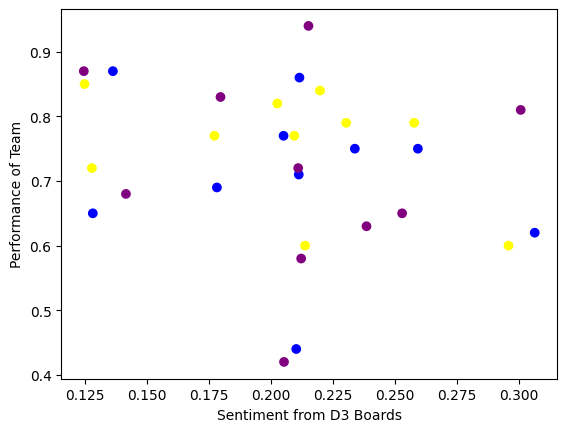

In [19]:
evaluator.graphPerformance(sentimentScores)